<H1> Расчет размера выборки </H1>
Определите размер выборки для исследования с доверительным уровнем в 99% и ошибкой не более 1% при том, что мы не знаем, что 80% генеральной совокупности обладают целевым признаком. Результат расчета (целое число) сохраните в переменную size.

In [3]:
import scipy.stats as st
conf = 0.99 #доверительный уровень в долях
Z = st.norm.ppf(conf + (1-conf)/2)
p = 0.8
q = 1 - p
delta = 0.01 #ошибка в долях
size = round(((Z**2)*p*q)/delta**2)
size

10616

<h1> Расчет доверительного интервала </h1>
У вас есть данные возрастов репрезентативной выборки сотрудников компании, которые генерируются кодом (см. окно ввода ответа).

Рассчитайте промежуток, в котором будет находиться среднее генеральной совокупности с 99% надежностью? Ответом должен выступать кортеж. Сохраните его в переменную ci.

In [6]:
import random
import scipy.stats as st
import numpy as np

random.seed(10)
ages = []
for i in range(0,30):
    n = random.randint(18,75)
    ages.append(n)

# т.к выборка маленькая то используем t выборку, вместо alpha используем confidence
# пример для большой выборкии st.norm.interval(alpha=а, loc=np.mean(data), scale=st.sem(data))
ci = st.t.interval(confidence=0.99, df=len(ages)-1, loc=np.mean(ages), scale=st.sem(ages))
ci

(35.61675553211002, 52.18324446788998)

In [13]:
a = np.array((18, 14, 23, 36))
b = np.array([1, 2, 3, 2])
c = a + b

c


array([19, 16, 26, 38])

<h1>Метод наименьших квадратов</h1>
В этом задании вам необходимо реализовать алгоритм МНК (метод наименьших квадратов) в виде функции с использованием библиотеки numpy:

def mnk(x_,y_):
    …
    return a,b
Входные данные:

●     x_: временной ряд x длиной 30 точек, сгенерированный с помощью функции linspace;

●     y_: временной ряд y длиной 30 точек, сгенерированный с помощью функции linspace с коэффициентами a и b.


Написанная функция должна возвращать коэффициенты a и b функции линейной аппроксимации 

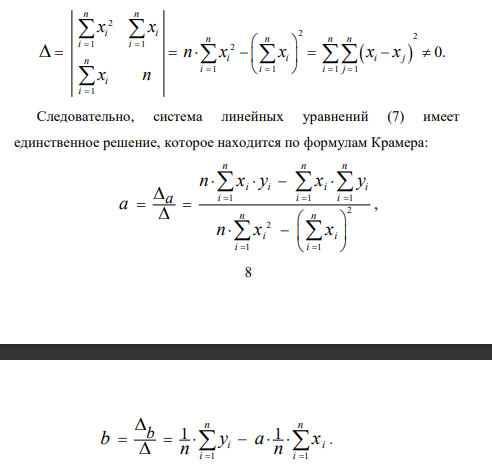(y = ax + b).

In [15]:
def mnk(x_,y_):
    n = len(x_)
    smX = np.sum(x_)
    smY = np.sum(y_)
    smX2 = np.sum(x_ ** 2)
    smXY = np.sum(x_ * y_)

    a = (n * smXY - smX * smY) / (n * smX2 - smX ** 2)
    b = (smY - a * smX) / n 
    return a,b



x_ = np.linspace(0, 10, 30)
y_ = 2 * x_ + 1
a, b = mnk(x_, y_)
print(a, b)

1.9999999999999991 1.0000000000000038


<h1>Вам предложены данные о клиентах, которые хранятся в следующем формате:</h1> 
| N | name | city   | age |
| --- | --- | --- | --- |
| 0 | Pet  | Moscow   4 | 
| 1 | Irina | Ryazan   2  |
 |





Выполните следующие задания применительн1)  данн1. ым:

Удалите строки, где 2)ть про2. пуски.
Удалите дубликаты, если они им3)тся в 3. данных.
Замените нулевые значения средними по столбцу без учета строки ну4)вого з4. начения.
Сохраните результаты проделанных действий в датафрейм с именем df

In [20]:
import pandas as pd

data = {
    'name': ['Petr', 'Irina', 'Petr', 'John', 'Anna', 'Tom', 'Nina', None, 'Alex', 'Irina'],
    'city': ['Moscow', 'Ryazan', 'Moscow', 'Kazan', 'Moscow', 'Minsk', 'Kazan', 'Minsk', 'Ryazan', None],
    'age': [41, 25, 41, 30, 35, 0, 29, 28, 0, 25]
}

df = pd.DataFrame(data)
print(df)

# df = pd.read_csv('users.csv', sep=',')
df = df.dropna()
df = df.drop_duplicates()
mean_age = df[df['age'] != 0]['age'].mean()
df.age = df.age.replace(0, mean_age)


print(df)

    name    city  age
0   Petr  Moscow   41
1  Irina  Ryazan   25
2   Petr  Moscow   41
3   John   Kazan   30
4   Anna  Moscow   35
5    Tom   Minsk    0
6   Nina   Kazan   29
7   None   Minsk   28
8   Alex  Ryazan    0
9  Irina    None   25
    name    city  age
0   Petr  Moscow   41
1  Irina  Ryazan   25
3   John   Kazan   30
4   Anna  Moscow   35
5    Tom   Minsk   32
6   Nina   Kazan   29
8   Alex  Ryazan   32


<h1> Анализ электромобилей — 1 </h1>
Вам предложены данные об электромобилях, которые хранятся в файле Electric_Car.csv.

Выполните следующие действия применительно к данным1) :

Сагрегируйте данные по брендам (поле Bra2) nd).
Вычислите среднее значение цены (поле PriceEuro) для каждой гр3) уппы.
Сохраните результаты проделанных действий в датафрейм с именем Carsgroupby.

In [27]:
import pandas as pd

Cars = pd.read_csv('Electric_Car.csv')
Cars.info()

Carsgroupby = Cars.groupby("Brand")["PriceEuro"].mean().reset_index()


print(Carsgroupby)
print(Carsgroupby['PriceEuro'].sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB
          Brand      PriceEuro
0       Aiways    36057.000000
1         Audi    80593.666667
2  

<h1>Анализ электромобилей — 2</h1>
Вам предложены данные об электромобилях, которые хранятся в файле Electric_Car.csv.

Выполните следующие действия применительно к данным1. :

Сделайте срез по столбцу PriceEuro со значениями более 50000 и по столбцу TopSpeed_KmH со значениями более 2. 200.
Переназначьте индексы таблицы начиная с 3. нуля.
Сохраните результаты проделанных действий в датафрейм с именем Cars_speed.

In [29]:
Cars = pd.read_csv('Electric_Car.csv')


Cars_speed = Cars[(Cars.PriceEuro > 50000) & (Cars.TopSpeed_KmH > 200)]
Cars_speed.reset_index(drop=True, inplace=True)

Cars_speed


,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
2,Lucid,Air,2.8,250,610,180,620,Yes,AWD,Type 2 CCS,Sedan,F,5,105000
3,Porsche,Taycan Turbo S,2.8,260,375,223,780,Yes,AWD,Type 2 CCS,Sedan,F,4,180781
4,Tesla,Model Y Long Range Dual Motor,5.1,217,425,171,930,Yes,AWD,Type 2 CCS,SUV,D,7,58620
5,Audi,e-tron GT,3.5,240,425,197,850,Yes,AWD,Type 2 CCS,Sedan,F,4,125000
6,Tesla,Model 3 Long Range Performance,3.4,261,435,167,910,Yes,AWD,Type 2 CCS,Sedan,D,5,61480
7,Tesla,Cybertruck Tri Motor,3.0,210,750,267,710,Yes,AWD,Type 2 CCS,Pickup,N,6,75000
8,Tesla,Model S Long Range,3.8,250,515,184,560,Yes,AWD,Type 2,Liftback,F,5,79990
9,Porsche,Taycan 4S,4.0,250,365,195,730,Yes,AWD,Type 2 CCS,Sedan,F,4,102945


<h1>Анализ электромобилей — 3</h1>
Вам предложены данные, которые хранятся в датафреймах EC.csv , EVP.csv.

Вам необходимо:

1.	Выполнить операцию слияния таблиц по столбцу Brand и сохранить результат в переменную integral.
2.	Получить описательные статистики для полученной таблицы integral с помощью функции describe(). 
3.	Сохранить результат вывода описательных статистик в переменную describe_pd.

In [36]:
EC = pd.read_csv('EC.csv', sep=',')
EVP = pd.read_csv('EVP.csv', sep=',')

pd.merge(EC, EVP, on='Brand')
integral = EC
describe_pd = integral.describe()
describe_pd

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000
